In [ ]:
# Librerias ensenciales para trabajar
from PIL import Image
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2025-02-16 14:38:38.468453: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-16 14:38:38.473776: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-16 14:38:38.523629: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-16 14:38:38.569423: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739734718.606457   21376 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739734718.61

## Data preparation
+ La data estába separada por carpetas
+ Para ello vamos a juntarla y luego mezclarla
+ La data se obtuvo de: https://www.kaggle.com/datasets/tongpython/cat-and-dog


In [1]:
from sklearn.model_selection import train_test_split

# Directorios de imágenes
carpeta_training_cats = 'archive/training_set/training_set/cats'
carpeta_training_dogs = 'archive/training_set/training_set/dogs'
carpeta_testing_cats = 'archive/test_set/test_set/cats'
carpeta_testing_dogs = 'archive/test_set/test_set/dogs'

# Tamaño de las imágenes
TAMANO_IMG = (128, 128)

# Listas para almacenar imágenes y etiquetas
imagenes = []
etiquetas = []

# Función para cargar imágenes y etiquetas
def cargar_imagenes(carpeta, etiqueta):
    for archivo in os.listdir(carpeta):
        ruta_imagen = os.path.join(carpeta, archivo)
        try:
            # Cargar y convertir imagen
            imagen = Image.open(ruta_imagen).convert("RGB").resize(TAMANO_IMG)
            
            # Convertir imagen a array y normalizar (0-255 → 0-1)
            imagen_array = np.array(imagen) / 255.0
            
            # Guardar imagen y etiqueta
            imagenes.append(imagen_array)
            etiquetas.append(etiqueta)
        
        except Exception as e:
            print(f"Error con {archivo}: {e}")


cargar_imagenes(carpeta_training_cats, etiqueta=0)  # Gatos = 0
cargar_imagenes(carpeta_training_dogs, etiqueta=1)  # Perros = 1

cargar_imagenes(carpeta_testing_cats, etiqueta=0)
cargar_imagenes(carpeta_testing_dogs, etiqueta=1)


imagenes = np.array(imagenes)
etiquetas = np.array(etiquetas)

# Dividir datos en entrenamiento y validación (80%-20%)
X_train, X_val, y_train, y_val = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)

# Imprimir información del dataset
print(f"Total imágenes de entrenamiento: {X_train.shape[0]}")
print(f"Total imágenes de validación: {X_val.shape[0]}")
print(f"Dimensión de las imágenes: {X_train.shape[1:]}")


NameError: name 'os' is not defined

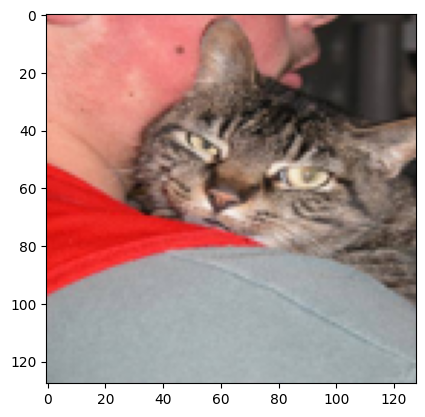

In [ ]:
#ejemplo de imagen de del dataset convinado
plt.imshow(imagenes[586])

In [ ]:
# vamos a crear una semilla para reproducirlo otra vez
import os
import random
import numpy as np
import tensorflow as tf

os.environ['PYTHONHASHSEED'] = '42'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

## Building the convolutional Neural Network
+ Usaré un modelo visto en uno de los scripts de la clase
+ Solo hay una salida pues es un problema binario
+ La función de perdida es Binary Cross Entropy, ya que es un problema binario

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Definir la CNN corregida
model = keras.Sequential([
    # Primera capa convolucional
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D((2,2)),  # Reducción de tamaño

    # Segunda capa convolucional
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    # Tercera capa convolucional
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),  # Faltaba en tu código

    # Aplanar para la capa densa
    keras.layers.Flatten(),
    
    # Capa completamente conectada
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),  
    
    # Capa de salida binaria
    keras.layers.Dense(1, activation='sigmoid') 
])


model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Mostrar resumen del modelo
model.summary()


/home/diego/Documentos/DMC- ADVANCE DATA SCIENCE/deeplearningproyect/myvenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-16 14:39:00.025705: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

## Training Model and Evaluate
+ Vamos a evaluarlo por 20 epocas
+ Usamos un batch size de 

In [ ]:
history = model.fit(
    X_train, y_train,           
    validation_data=(X_val, y_val),
    epochs=20,                  
    batch_size=32,              
    verbose=1
)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 45s 174ms/step - accuracy: 0.5398 - loss: 0.6891 - val_accuracy: 0.6147 - val_loss: 0.6664
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 43s 170ms/step - accuracy: 0.6344 - loss: 0.6395 - val_accuracy: 0.6869 - val_loss: 0.5953
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - accuracy: 0.7078 - loss: 0.5635 - val_accuracy: 0.7547 - val_loss: 0.5120
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 43s 170ms/step - accuracy: 0.7742 - loss: 0.4816 - val_accuracy: 0.7662 - val_loss: 0.4844
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 168ms/step - accuracy: 0.8102 - loss: 0.4253 - val_accuracy: 0.7547 - val_loss: 0.5005
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - accuracy: 0.8285 - loss: 0.3841 - val_accuracy: 0.7577 - val_loss: 0.4964
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 168ms/step - accuracy: 0.8565 - loss: 0.3330 - val_accuracy: 0.7612 - val_loss: 0.5119
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 43s 170ms/step - accuracy: 0.8736 - loss: 0

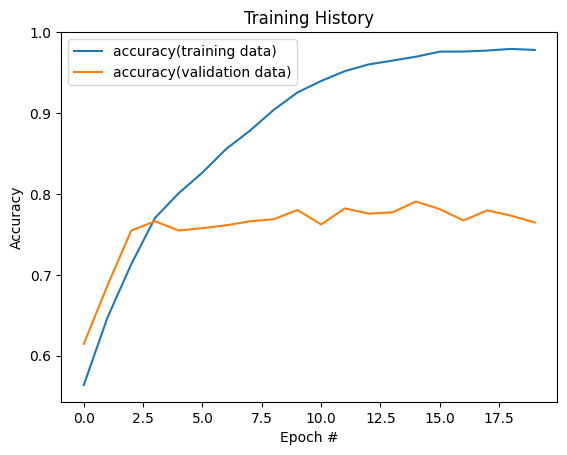

In [14]:
plt.plot(history.history['accuracy'], label='accuracy(training data)')
plt.plot(history.history['val_accuracy'], label='accuracy(validation data)')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch #')
plt.legend(loc="upper left")
plt.show()

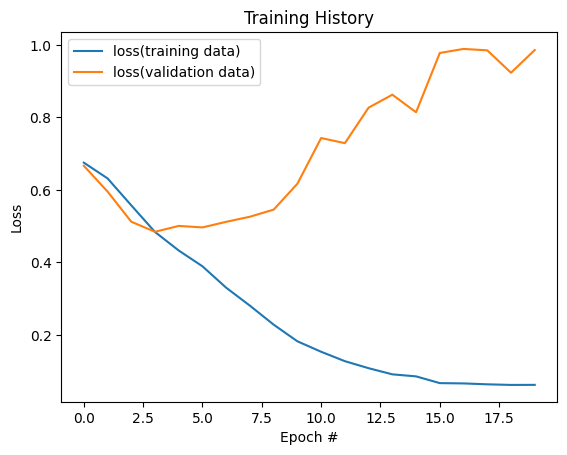

In [15]:
plt.plot(history.history['loss'], label='loss(training data)')
plt.plot(history.history['val_loss'], label='loss(validation data)')
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.legend(loc="upper left")
plt.show()

## Conclusiónes
Vemos que hay un sobreentrenamiento, y el punto ideal que se ve por la grafica es 5 o 6

## Predictions
+ Vamos a hacer la predicción para ver si el modelo predice bien
+ Caso contrario, tendríamos que ajustar la arquitectura o el modelo

In [22]:
# Obtener predicciones (asegúrate de usar X_val o X_test)
predictions = model.predict(X_val)

# Función para mostrar la imagen con su predicción
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = round(predictions_array[0])  # 0 = gato, 1 = perro
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel("{} {:2.0f}% ({})".format("Perro" if predicted_label == 1 else "Gato",
                                         100 * predictions_array[0],
                                         "Perro" if true_label == 1 else "Gato"),
               color=color)

# Función para mostrar la barra de probabilidades
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([0, 1], ["Gato", "Perro"])
    plt.yticks([])
    thisplot = plt.bar([0, 1], [1 - predictions_array[0], predictions_array[0]], color=["blue", "red"])
    plt.ylim([0, 1])
    predicted_label = round(predictions_array[0])
    thisplot[predicted_label].set_color('red')

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


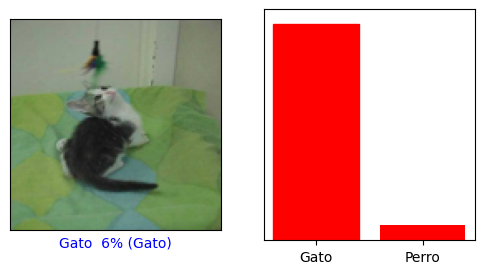

In [24]:
# Cambia la imagen de prueba
id_image = 346  # Cambia este número para ver otra imagen
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(id_image, predictions, y_val, X_val)
plt.subplot(1,2,2)
plot_value_array(id_image, predictions, y_val)
plt.show()


## Final
El modelo a pesar de sobreentrenado predice bien
